# TCR Data Science With  ML and Python Assignment

NAME :- CRISH A NAGARKAR

CERTIFICATE CODE :- TCRIB3R64

TOPIC :- 
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed (Col -21).

# STEP 1 : Import the relevant packages

In [1]:
%matplotlib inline

# Importing libraries
import pandas as pd

import os
working_directory = os.getcwd()
print(working_directory)
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

/Users/crishnagarkar


In [2]:
# Download and explore the dataset


In [9]:
path = working_directory + '/csv/bank-additional-full.csv'
data = pd.read_csv(path,sep=";", skipinitialspace=True)

In [12]:
df_bonus.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df_bonus.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [149]:
df_bonus.rename(columns={'y':'target'},inplace=True)

In [14]:
print("Number of rows",df_bonus.shape[0])

Number of rows 41188


In [16]:
print("Number of features/columns",df_bonus.shape[1])

Number of features/columns 21


In [17]:
df_bonus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [42]:
df_bonus.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [148]:
df_bonus.dtypes

age                 int64
default             int64
housing             int64
loan                int64
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

__Checking for missing values__

In [44]:
val=df_bonus.isnull().values.any()

if val==True:
    print("Missing values present : ", my_data.isnull().values.sum())
    my_data=data.dropna()
else:
    print("No missing values present")

No missing values present


In [18]:
#Find Mean
df_bonus.mean()

/var/folders/rf/rrll67zx03146l9_xq4c_9lc0000gn/T/ipykernel_45796/647048863.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bonus.mean()


age                 40.024060
duration           258.285010
campaign             2.567593
pdays              962.475454
previous             0.172963
emp.var.rate         0.081886
cons.price.idx      93.575664
cons.conf.idx      -40.502600
euribor3m            3.621291
nr.employed       5167.035911
dtype: float64

__Finding unique data__

In [45]:
df_bonus.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [23]:
# Pair Plot

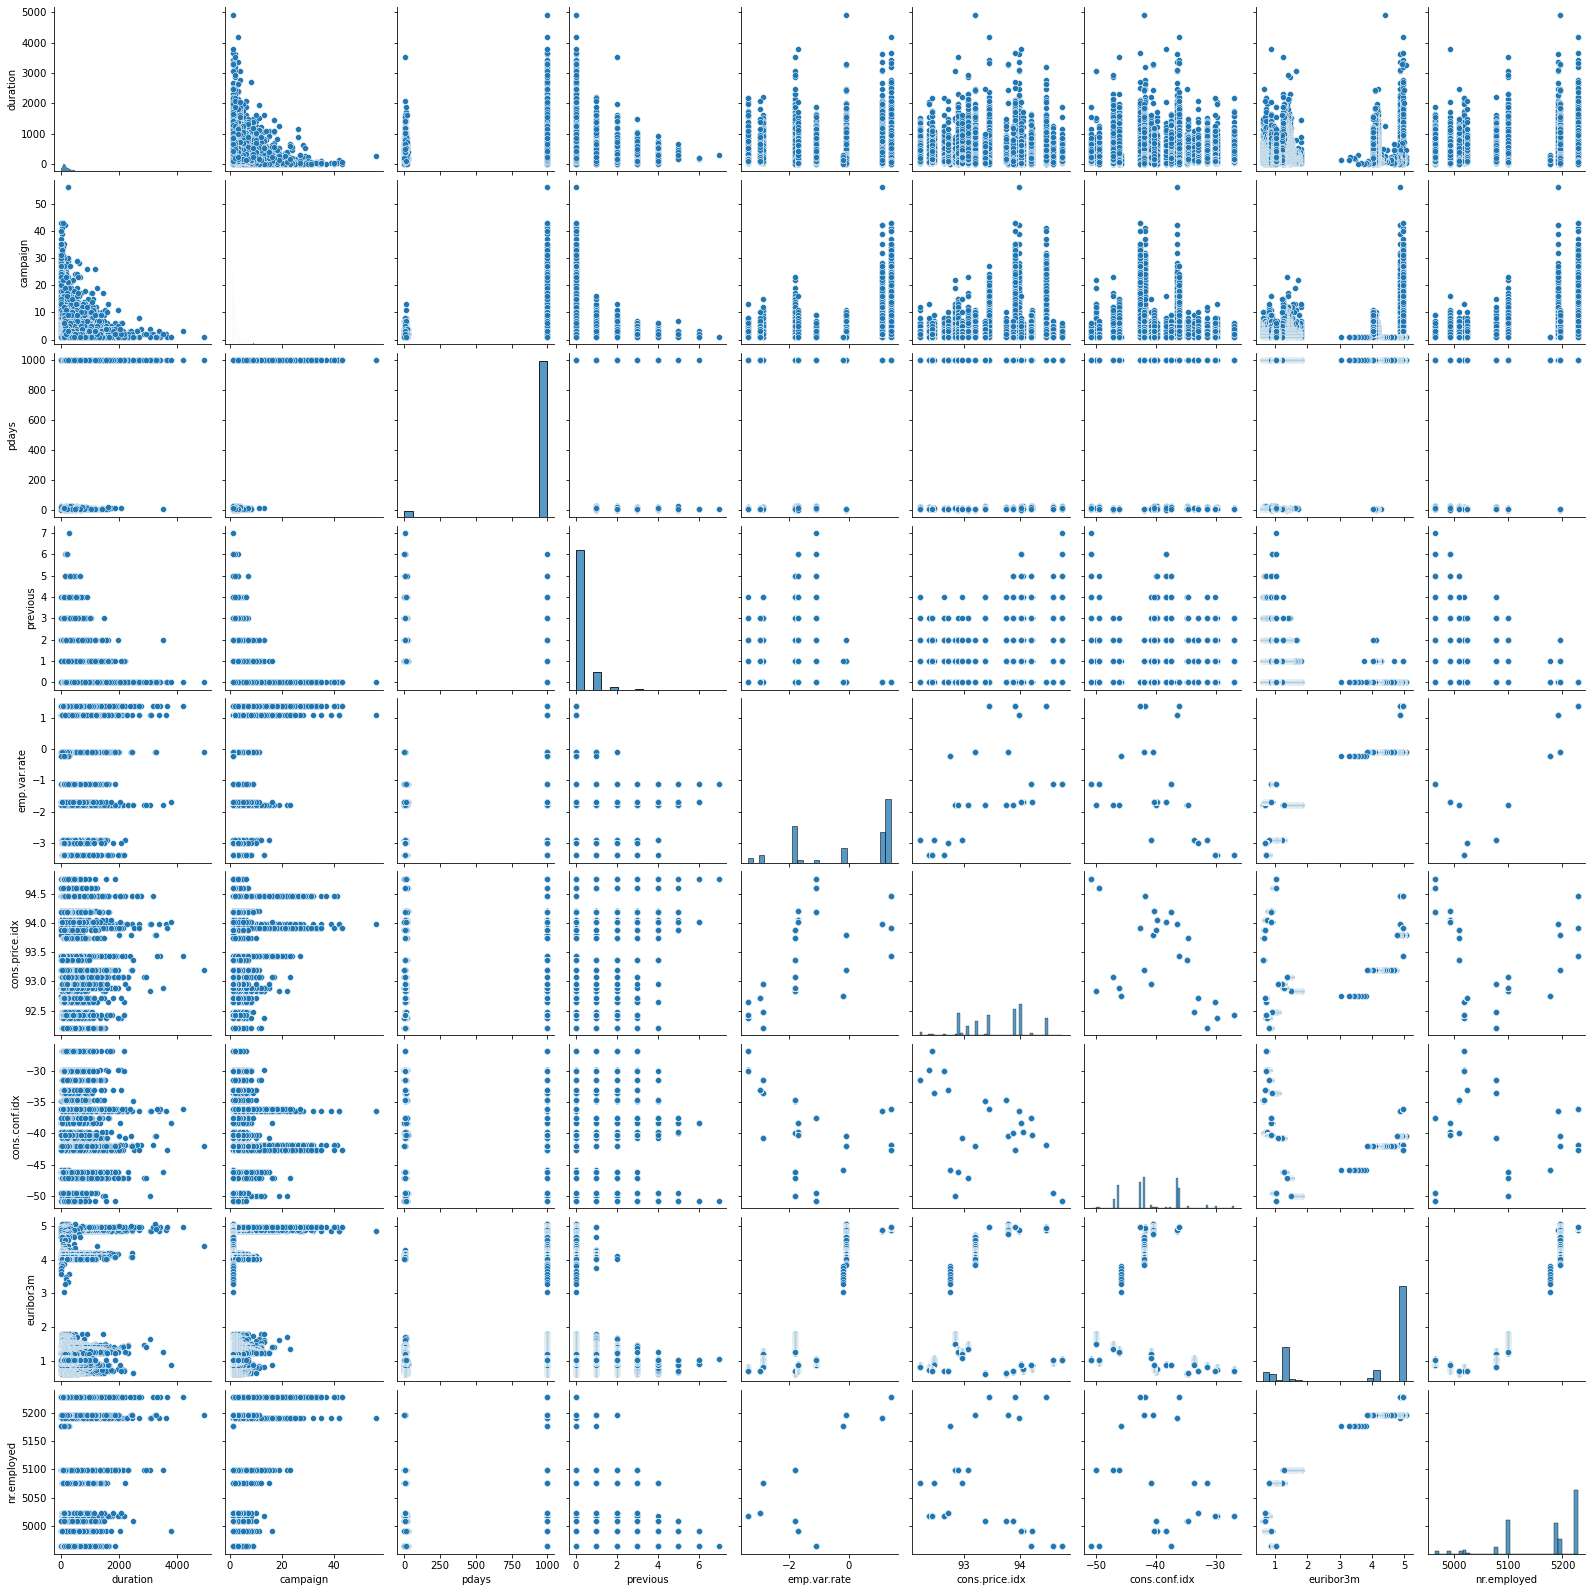

In [22]:
sns.pairplot(df_bonus.iloc[:,1:])



__Checking Outliers__

In [24]:
print('Min age: ', df_bonus['age'].max())
print('Max age: ', df_bonus['age'].min())

Min age:  98
Max age:  17


Text(0.5, 1.0, 'Age Distribution')

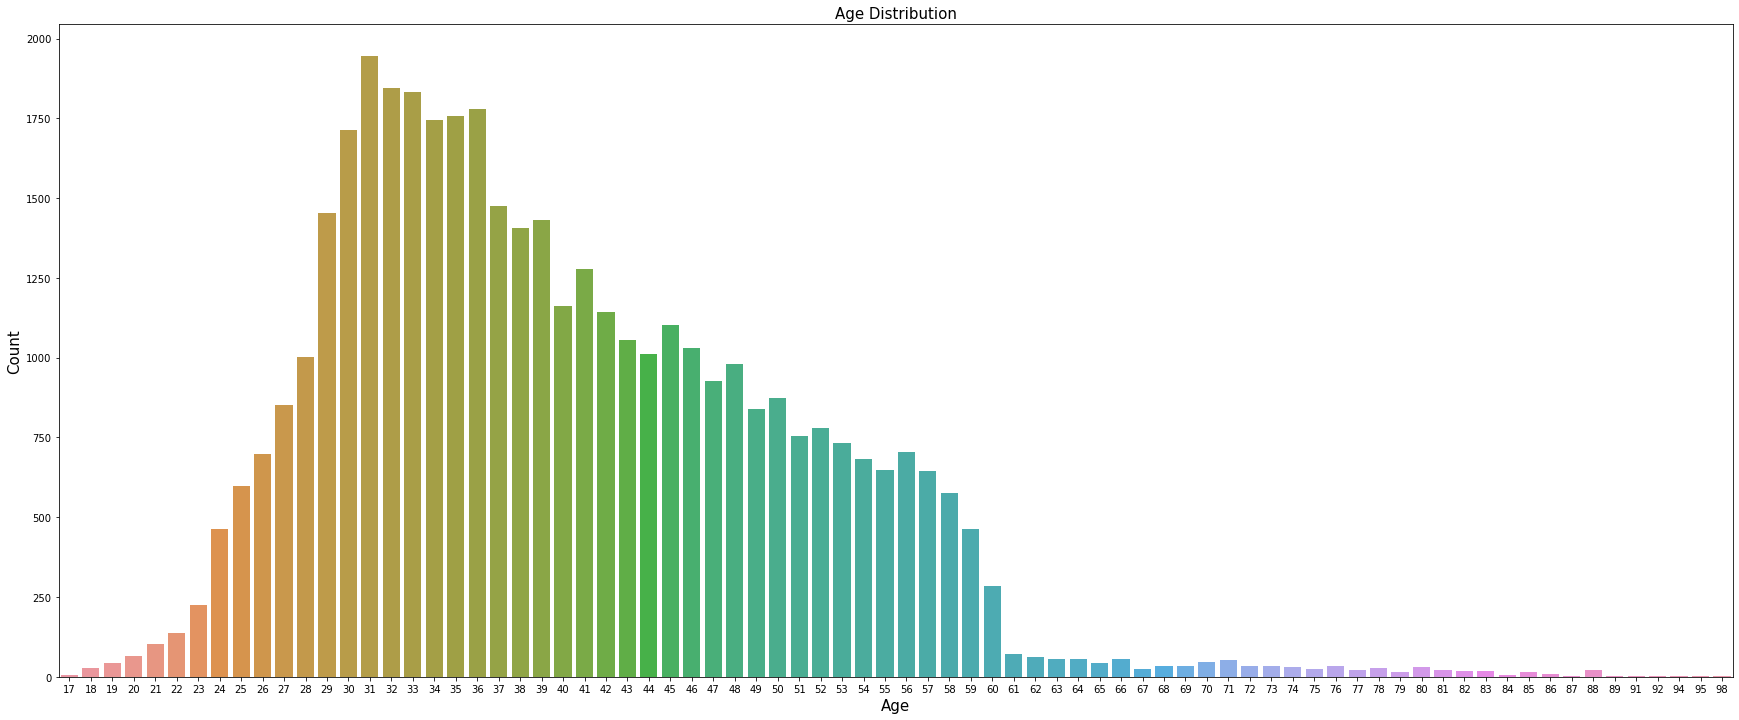

In [26]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'age', data = df_bonus)
plt.xlabel("Age", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Distribution', fontsize=15)

__Job__

Text(0.5, 1.0, 'Job Distribution')

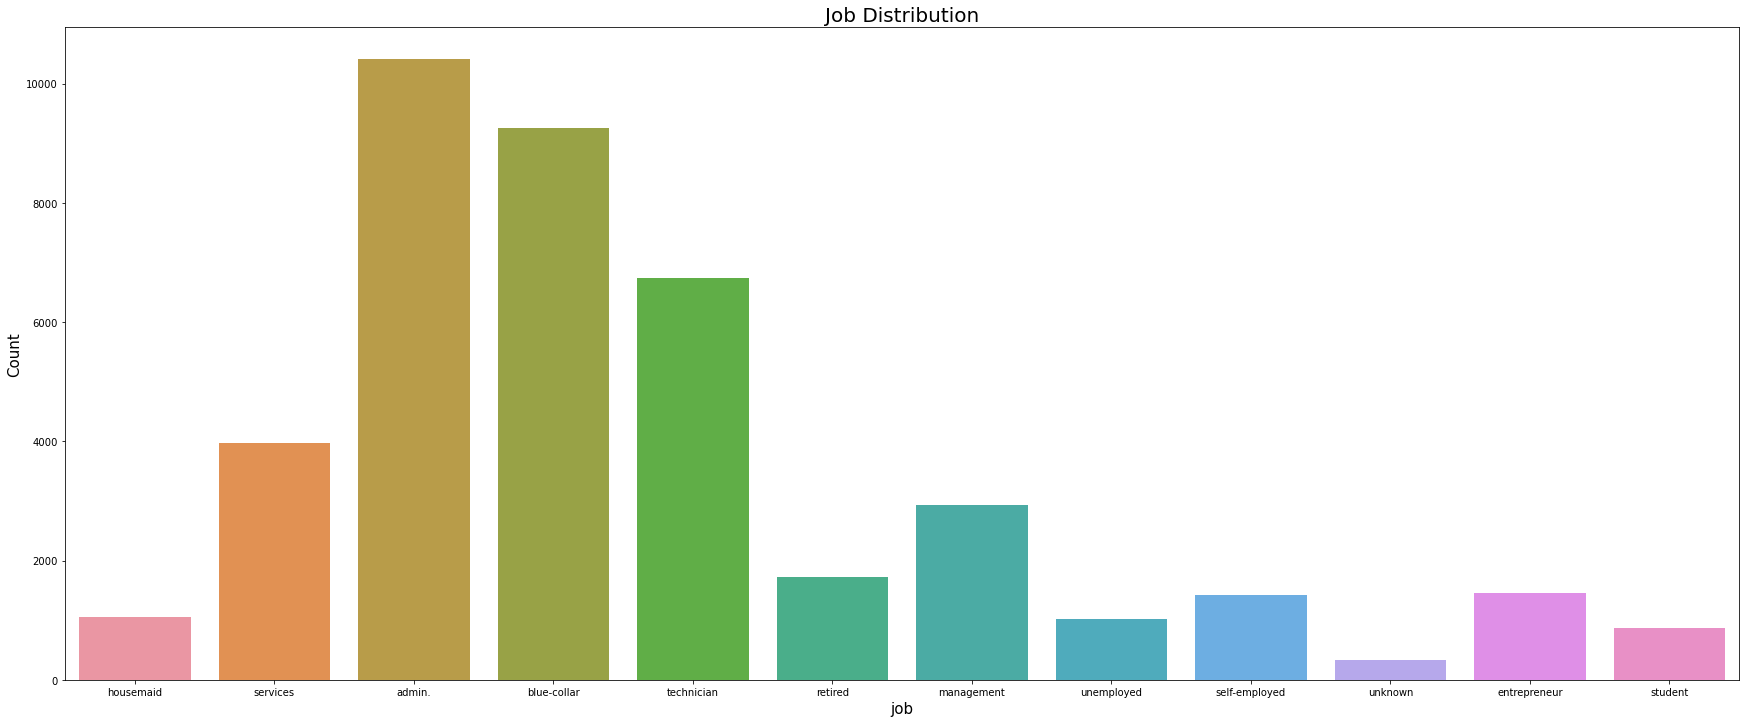

In [41]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = df_bonus)
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)

<AxesSubplot:xlabel='default', ylabel='age'>

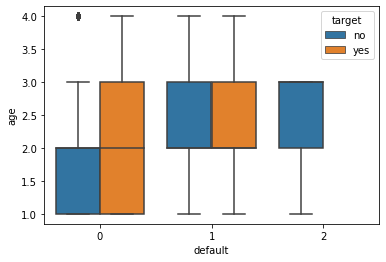

In [151]:
sns.boxplot(x='default',y='age',hue='target',data=df_bonus)

__Marital__

Text(0.5, 1.0, 'Marital Distribution')

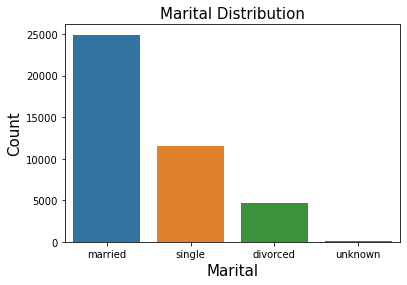

In [34]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'marital',data = df_bonus)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

__Education__

Text(0.5, 1.0, 'Education Distribution')

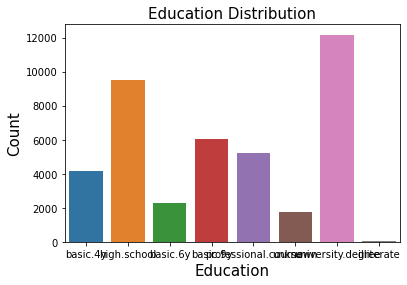

In [35]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'education',data = df_bonus)
plt.xlabel("Education", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=15)

The clients having secondary education are more .And the clients having unknown eduction are less

__Default__

Text(0.5, 1.0, 'Default Distribution')

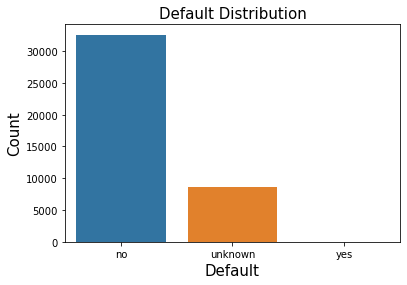

In [46]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'default',data = df_bonus)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

__Housing__

Text(0.5, 1.0, 'Housing Distribution')

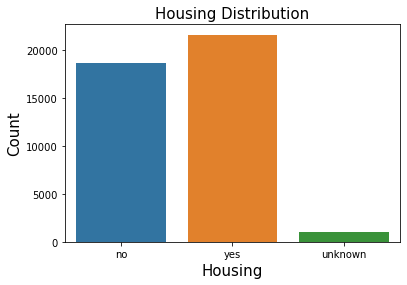

In [47]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'housing',data = df_bonus)
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)

In [50]:
print('Housing:\n No Housing:'     , df_bonus[df_bonus['housing'] == 'no']     ['age'].count(),
              '\n Yes Housing:' , df_bonus[df_bonus['housing'] == 'yes']    ['age'].count())

Housing:
 No Housing: 18622 
 Yes Housing: 21576


The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.

__Loan__

Text(0.5, 1.0, 'Loan Distribution')

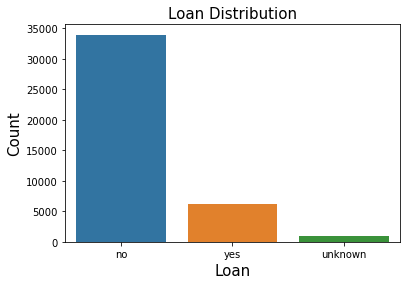

In [52]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'loan',data = df_bonus)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

In [53]:
print('Loan:\n No Personal loan:'     , df_bonus[df_bonus['loan'] == 'no']     ['age'].count(),
              '\n Yes Personal Loan:' , df_bonus[df_bonus['loan'] == 'yes']    ['age'].count())

Loan:
 No Personal loan: 33950 
 Yes Personal Loan: 6248


The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count

__Contact__

Text(0.5, 1.0, 'Contact Distribution')

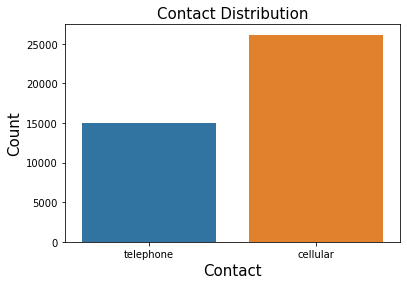

In [54]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'contact',data = df_bonus)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

The count of a clients who can be contacted by Cellular is high that the others

__Month__

Text(0.5, 1.0, 'Monthly Distribution')

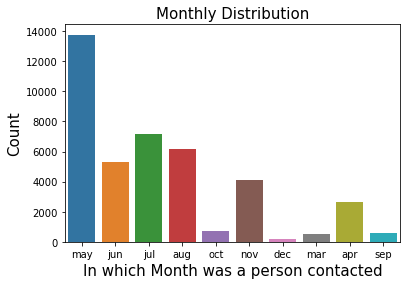

In [55]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'month',data = df_bonus)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.

__Calculate the correlation matrix__

In [56]:
cor=df_bonus.corr()
cor

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


__Heatmap__

<AxesSubplot:>

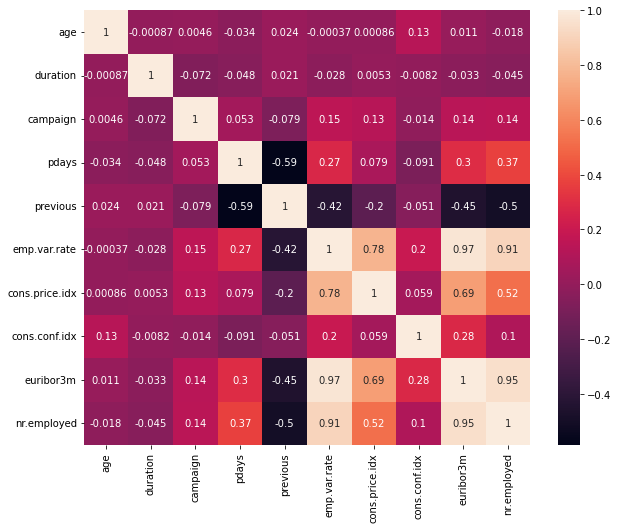

In [57]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

__Conclusion From EDA__

1.The ages are not that much important and dont make sense relate with other variables will not tell any insight.Just looking at the graphs we cannot conclude if age have a high effect to our Target variable.¶

2.Here we can see the percentage of the outliers for 'Age' is less, so we can fit the model with and without them.

3.If we consider the Job attribute we can see the count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.

4.Married people are more ,we can see in graph clearly.

5.The clients having secondary education are more .And the clients having unknown eduction are less .

6.The clients having bydefault credit are less than those who don't have bydefault credit.

7.The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.

8.The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count.

9.The count of a clients who can be contacted by Cellular is high that the others.

10.The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.

# STEP 3: Prepare the dataset for training

In [60]:
# Label encoder order in alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_bonus['job']      = labelencoder_X.fit_transform(df_bonus['job']) 
df_bonus['marital']  = labelencoder_X.fit_transform(df_bonus['marital']) 
df_bonus['education']= labelencoder_X.fit_transform(df_bonus['education']) 
df_bonus['default']  = labelencoder_X.fit_transform(df_bonus['default']) 
df_bonus['housing']  = labelencoder_X.fit_transform(df_bonus['housing']) 
df_bonus['loan']     = labelencoder_X.fit_transform(df_bonus['loan']) 

df_bonus['contact']     = labelencoder_X.fit_transform(df_bonus['contact']) 
df_bonus['month']       = labelencoder_X.fit_transform(df_bonus['month']) 

In [62]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df_bonus);

In [63]:
df_bonus.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
print(df_bonus.shape)
df_bonus.head()



(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(df_bonus);

In [69]:
df_bonus.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
df_bonus.loc[(df_bonus['pdays'] == 999), 'pdays'] = 1
df_bonus.loc[(df_bonus['pdays'] > 0) & (df_bonus['pdays'] <= 10), 'pdays'] = 2
df_bonus.loc[(df_bonus['pdays'] > 10) & (df_bonus['pdays'] <= 20), 'pdays'] = 3
df_bonus.loc[(df_bonus['pdays'] > 20) & (df_bonus['pdays'] != 999), 'pdays'] = 4 
df_bonus.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [73]:
df_bonus['poutcome'].replace(['unknown', 'failure','other', 'success'], [1,2,3,4], inplace  = True)

In [74]:
print(df_bonus.shape)
df_bonus.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [76]:
Final_data=df_bonus
print(Final_data.shape)
Final_data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,mon,...,1,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__TARGET__

array([[<AxesSubplot:title={'center':'age'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'campaign'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'cons.conf.idx'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'cons.price.idx'}, xlabel='[target]'>],
       [<AxesSubplot:title={'center':'default'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'duration'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'emp.var.rate'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'euribor3m'}, xlabel='[target]'>],
       [<AxesSubplot:title={'center':'housing'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'loan'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'nr.employed'}, xlabel='[target]'>,
        <AxesSubplot:title={'center':'pdays'}, xlabel='[target]'>],
       [<AxesSubplot:title={'center':'previous'}, xlabel='[target]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

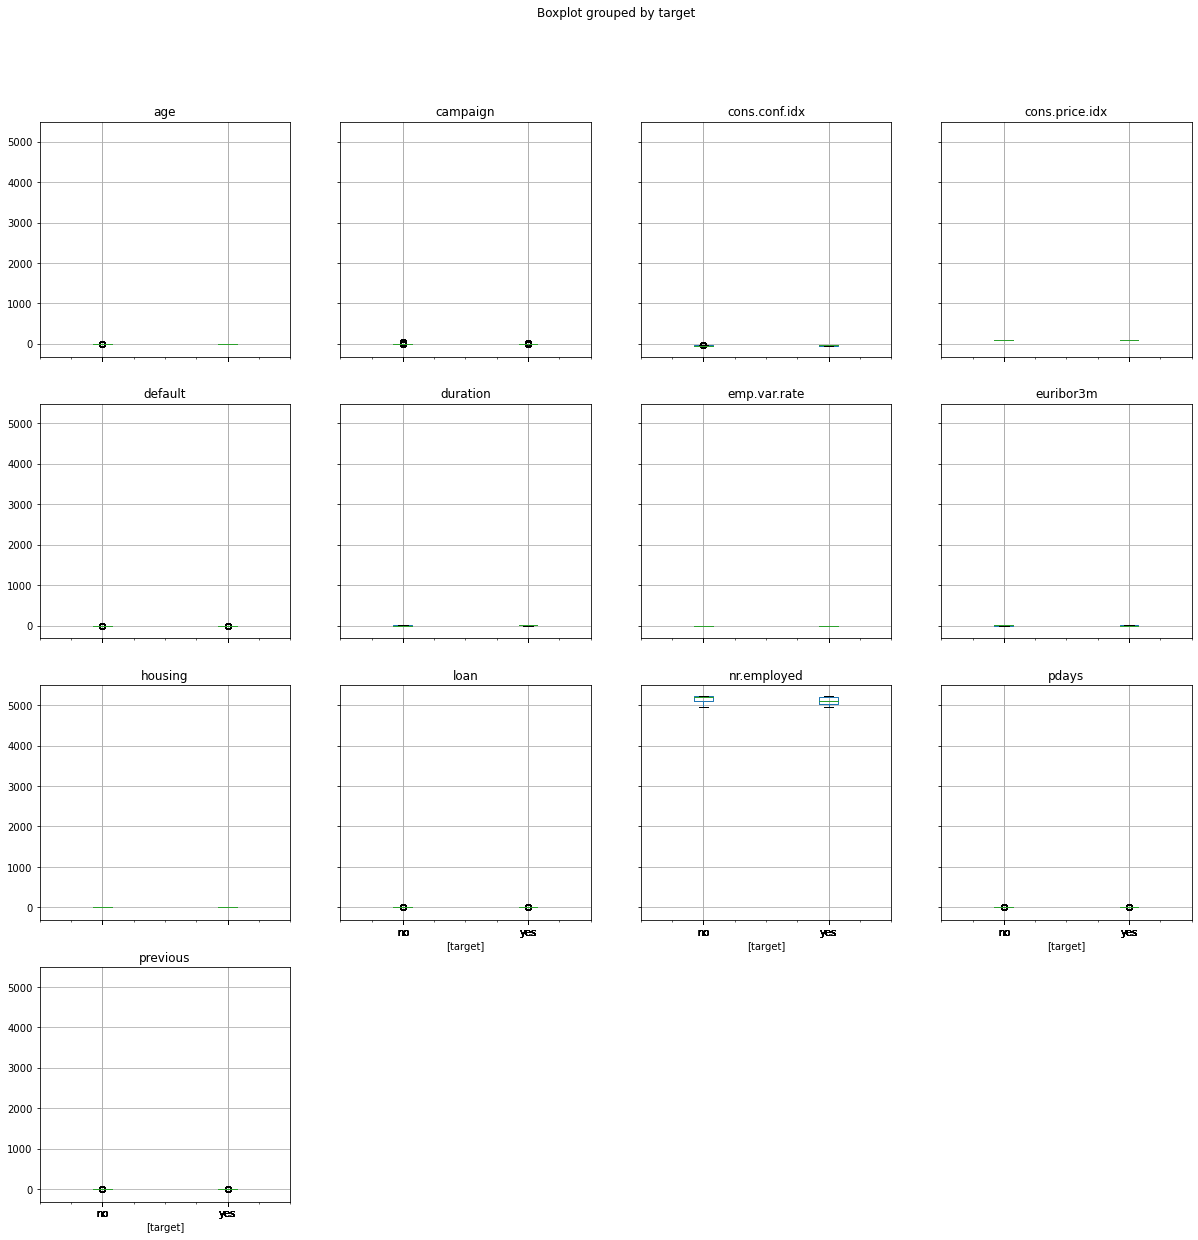

In [150]:
df_bonus.boxplot(by = 'target',  layout=(4,4), figsize=(20, 20))

Text(0.5, 1.0, 'target distribution')

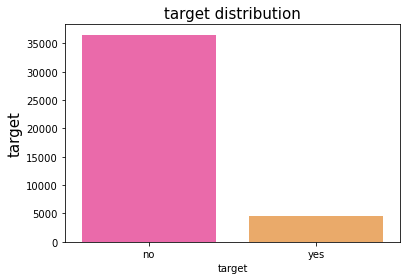

In [153]:
sns.countplot(x = 'target', data = df_bonus, orient = 'v',palette="spring")
plt.ylabel("target", fontsize=15)
plt.title('target distribution', fontsize=15)

In [154]:
#Let us look at the target column which is "target"(yes/no).
df_bonus.groupby(["target"]).count()

,age,default,housing,loan,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
target,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


# STEP 4: Train the model to fit the data

__Applying the NB model and print the accuracy of NB model.__

In [142]:
df_bonus = df_bonus.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
df_bonus.head()

,age,default,housing,loan,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,0,0,0,mon,3,1,2,0,1.1,93.994,-36.4,4.857,5191.0,no
1,3,1,0,0,mon,2,1,2,0,1.1,93.994,-36.4,4.857,5191.0,no
2,2,0,2,0,mon,3,1,2,0,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,0,0,mon,2,1,2,0,1.1,93.994,-36.4,4.857,5191.0,no
4,3,0,0,2,mon,3,1,2,0,1.1,93.994,-36.4,4.857,5191.0,no


In [155]:
y = df_bonus.target.values
x_data = df_bonus.drop(['target'], axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias